In [255]:
# Installing fbprophet package
! pip install fbprophet

In [0]:
# Importing the required packages
import fbprophet
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [257]:
# Chekcing all the modules present in the fbprophet packages
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [258]:
# Required only if you are reading data from the google drive
'''
from google.colab import drive
drive.mount('/content/drive',force_remount=False)
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive',force_remount=False)\n"

In [0]:
# Reading data from sites can be pointed to trusted site
cov_world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# New Section

In [260]:
# Checking for few records from the dataframe
cov_world.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [261]:
# Doing some basic checks
cov_world.shape

(12875, 16)

In [0]:
# Select only the required columns
cov_world = cov_world[['location','date','new_cases']]

In [263]:
cov_world.head()

,location,date,new_cases
0,Aruba,2020-03-13,2
1,Aruba,2020-03-20,2
2,Aruba,2020-03-24,8
3,Aruba,2020-03-25,5
4,Aruba,2020-03-26,2


In [264]:
# Checking the names of the infected counties
cov_world.location.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji',
       'Falkland Islands', 'France', 'Faeroe Islands', 'Gabon',
 

In [0]:
# Doing analysis only for india
cov_india = cov_world.loc[cov_world.location=='India']

In [266]:
# Doing some checks on the selected data
print(cov_india.shape)
print(cov_india.dtypes)

(115, 3)
location     object
date         object
new_cases     int64
dtype: object


In [267]:
# Doing basic formatiing for plotting the dataset
cov_india['date'] = pd.to_datetime(cov_india['date'])
cov_india = cov_india.set_index('date')
cov_india.drop('location',axis=1,inplace=True)
cov_india.tail()

,new_cases
date,
2020-04-20,1553
2020-04-21,1335
2020-04-22,1384
2020-04-23,1409
2020-04-24,1684


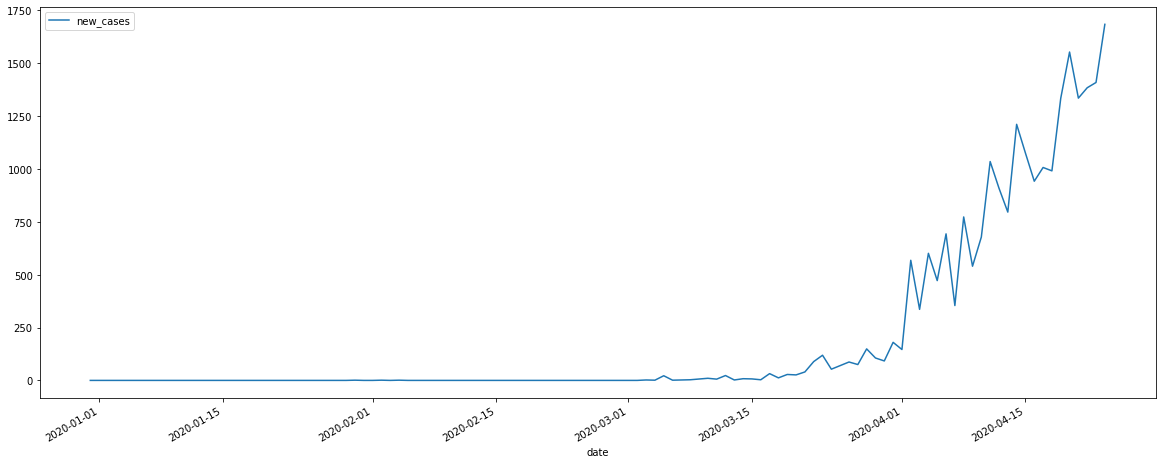

In [268]:
cov_india.plot(figsize=(20,8))

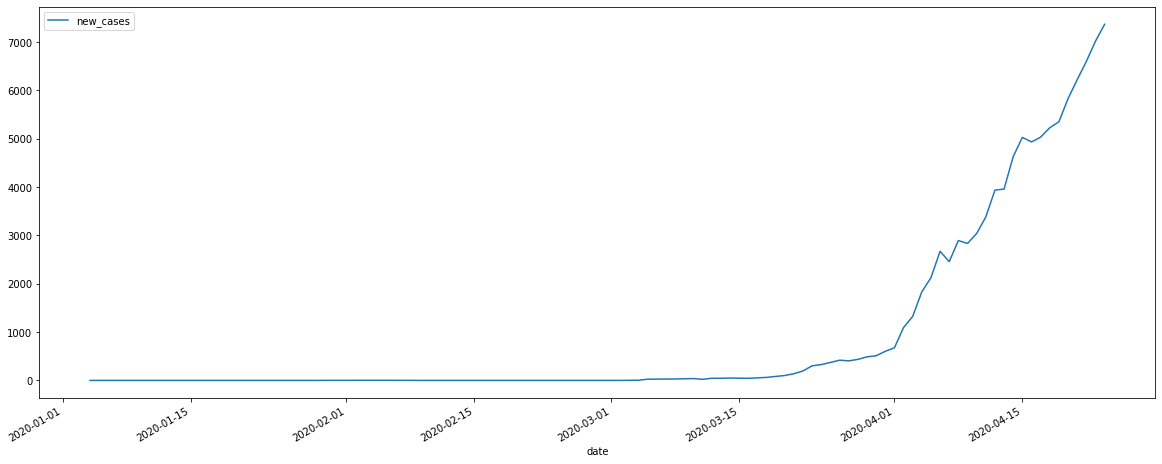

In [269]:
# Remove the seasonility from the dataframe before plotting
cov_india_roll = cov_india.rolling(window=5).sum()
cov_india_roll = cov_india_roll[4:]
cov_india_roll.plot(figsize=(20,8))

In [270]:
# Prepairing the data for 'prophet' package
cov_india_p = cov_india.reset_index()
cov_india_p.columns = ['ds','y']
cov_india_p.head()

,ds,y
0,2019-12-31,0
1,2020-01-01,0
2,2020-01-02,0
3,2020-01-03,0
4,2020-01-04,0


In [0]:
# cov_india_train = cov_india_p[:100]
# cov_india_test =  cov_india_p[100:]

In [271]:
# Instansiate and fit the model on the data
model = Prophet()
model.fit(cov_india_p)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [272]:
# Making future dates for prediction
future_dates = model.make_future_dataframe(periods=15)
future_dates.tail()

,ds
125,2020-05-05
126,2020-05-06
127,2020-05-07
128,2020-05-08
129,2020-05-09


In [0]:
# predicting the future dates and note original data also included in this
forecast = model.predict(future_dates)
forecast_n = forecast[['ds','yhat','yhat_lower','yhat_upper']]

In [275]:
# Checking all the data here yhat represent the prediction
forecast.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
120,2020-04-30,1755.200037,1648.531134,1840.809606,1745.553866,1765.211700,-6.264249,-6.264249,-6.264249,-6.264249,-6.264249,-6.264249,0.0,0.0,0.0,1748.935788
121,2020-05-01,1804.076956,1704.121568,1899.247066,1791.825498,1817.361036,-8.698871,-8.698871,-8.698871,-8.698871,-8.698871,-8.698871,0.0,0.0,0.0,1795.378085
122,2020-05-02,1852.953875,1765.776175,1962.091914,1836.638696,1870.274591,9.330728,9.330728,9.330728,9.330728,9.330728,9.330728,0.0,0.0,0.0,1862.284603
123,2020-05-03,1901.830794,1801.915222,2011.097853,1881.406632,1922.785325,2.509308,2.509308,2.509308,2.509308,2.509308,2.509308,0.0,0.0,0.0,1904.340102
124,2020-05-04,1950.707713,1865.516522,2065.426742,1927.544611,1975.517339,11.235619,11.235619,11.235619,11.235619,11.235619,11.235619,0.0,0.0,0.0,1961.943332
125,2020-05-05,1999.584631,1885.988114,2080.557637,1972.298484,2028.862226,-6.401589,-6.401589,-6.401589,-6.401589,-6.401589,-6.401589,0.0,0.0,0.0,1993.183043
126,2020-05-06,2048.461550,1944.445104,2148.551427,2015.386466,2081.631596,-1.710946,-1.710946,-1.710946,-1.710946,-1.710946,-1.710946,0.0,0.0,0.0,2046.750604
127,2020-05-07,2097.338469,1994.327261,2198.922094,2059.345622,2135.534316,-6.264249,-6.264249,-6.264249,-6.264249,-6.264249,-6.264249,0.0,0.0,0.0,2091.074220
128,2020-05-08,2146.215388,2033.464721,2244.919352,2102.695782,2189.378940,-8.698871,-8.698871,-8.698871,-8.698871,-8.698871,-8.698871,0.0,0.0,0.0,2137.516517
129,2020-05-09,2195.092307,2092.377791,2319.185205,2147.148666,2244.245216,9.330728,9.330728,9.330728,9.330728,9.330728,9.330728,0.0,0.0,0.0,2204.423035


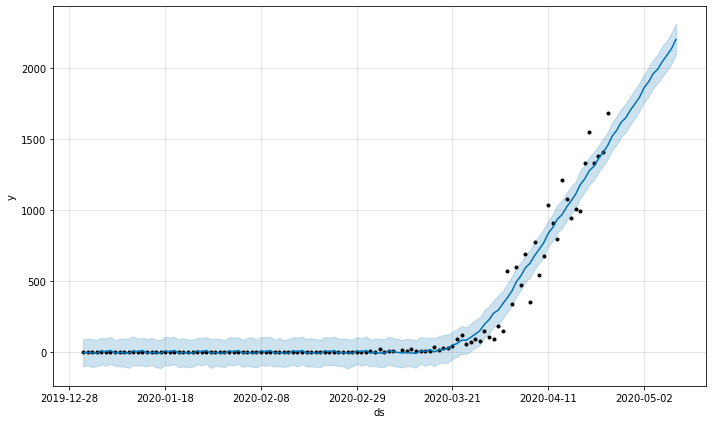

In [254]:
# Plotting the forcasted values here we can see our model has not done a descent job 
model.plot(forecast);

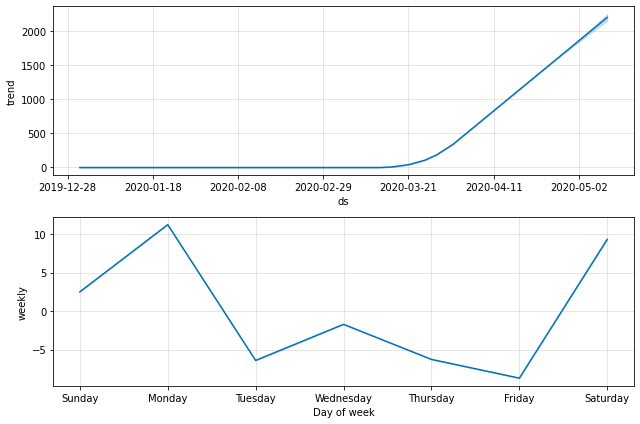

In [276]:
# prophet provide inbuilt package for plotting the timeseries component separately
model.plot_components(forecast);

In [127]:
# Ignore
'''
!pip install plotly
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(model,forecast)
py.iplot(fig)
'''